# Part B – Accessing a Web Page Table Using Beautiful Soup 

In [10]:
# import the packages
import requests 
from bs4 import BeautifulSoup 
import numpy as np

In [2]:
urlString='https://www.treasury.gov/resource-center/data-chart-center/interest-rates/Pages/TextView.aspx?data=yield'
page = requests.get(urlString)
soup = BeautifulSoup(page.content, 'html.parser')

In [3]:
t_chart = soup.find(class_="t-chart")
table_body = t_chart.find("tbody")
print(table_body)

None


In [4]:
col0 = []
col1 = []
col2 = []
col3 = []
col4 = []
col5 = []
col6 = []
col7 = []
col8 = []
tableRows = t_chart.find_all('tr') # within the found node, find all the <tr> (rows)
for row in tableRows:
    cells = row.findAll('td') # within the row, find each <td> (cell)
    if (len(cells) > 0):
       cell0 = cells[0].text.strip()
       col0.append(cell0)        
       cell1 = cells[1].text.strip()
       col1.append(cell1)        
       cell2 = cells[2].text.strip()
       col2.append(cell2)        
       cell3 = cells[3].text.strip()
       col3.append(cell3)
       cell4 = cells[4].text.strip()
       col4.append(cell4) 
       cell5 = cells[5].text.strip()
       col5.append(cell5) 
       cell6 = cells[6].text.strip()
       col6.append(cell6) 
       cell7 = cells[7].text.strip()
       col7.append(cell7) 
       cell8 = cells[8].text.strip()
       col8.append(cell8)
       print(cell0, cell1, cell2, cell3, cell4, cell5, cell6, cell7, cell8, sep=" ")


02/03/20 1.56 1.57 1.57 1.56 1.46 1.36 1.34 1.35
02/04/20 1.55 1.57 1.57 1.57 1.48 1.41 1.40 1.42
02/05/20 1.55 1.56 1.57 1.57 1.49 1.44 1.43 1.46
02/06/20 1.59 1.59 1.57 1.58 1.51 1.44 1.43 1.45
02/07/20 1.57 1.58 1.56 1.57 1.49 1.41 1.39 1.41
02/10/20 1.58 1.58 1.58 1.58 1.45 1.37 1.36 1.38


In [5]:
import pandas as pd
df = pd.DataFrame({"1mo":col1,"3mo":col2,"6mo":col3,"1yr":col4,"2yr":col5,"5yr":col6,"10yr":col7,"30yr":col8}, index=col0)
df

,1mo,3mo,6mo,1yr,2yr,5yr,10yr,30yr
02/03/20,1.56,1.57,1.57,1.56,1.46,1.36,1.34,1.35
02/04/20,1.55,1.57,1.57,1.57,1.48,1.41,1.40,1.42
02/05/20,1.55,1.56,1.57,1.57,1.49,1.44,1.43,1.46
02/06/20,1.59,1.59,1.57,1.58,1.51,1.44,1.43,1.45
02/07/20,1.57,1.58,1.56,1.57,1.49,1.41,1.39,1.41
02/10/20,1.58,1.58,1.58,1.58,1.45,1.37,1.36,1.38


In [6]:
#extract the latest yields
row = df.iloc[-1:]
row

,1mo,3mo,6mo,1yr,2yr,5yr,10yr,30yr
02/10/20,1.58,1.58,1.58,1.58,1.45,1.37,1.36,1.38


In [7]:
#Plot the latest yield curve.
import matplotlib.pyplot as plt

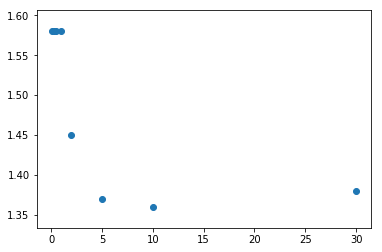

In [21]:
df.iloc[-1] = df.iloc[-1].astype(float)
y_value = df.iloc[-1]
x_value = [1/12, 3/12, 6/12, 1, 2, 5, 10, 30]
plt.scatter(x_value, y_value)
plt.show()

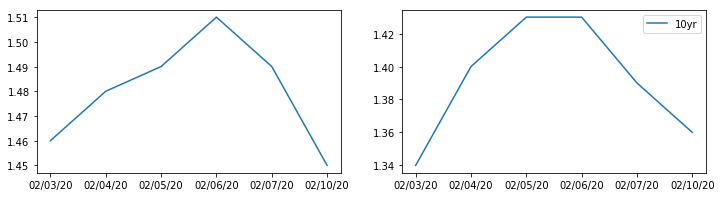

In [22]:
#Plot the time series of the 2 year and 10 year
fig = plt.figure(figsize=(12,3))
ax1, ax2 = fig.subplots(1, 2)
df["2yr"] = df["2yr"].astype(float)
df["10yr"] = df["10yr"].astype(float)
ax1.plot(df["2yr"])
ax2.plot(df["10yr"])
plt.legend() 
plt.show()

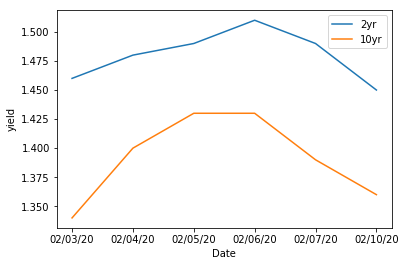

In [23]:
df["2yr"] = df["2yr"].astype(float)
df["10yr"] = df["10yr"].astype(float)
ax1 = df["2yr"]
ax2 = df["10yr"]
plt.figure()
plt.plot(ax1, label='2yr')
plt.plot(ax2, label='10yr')
plt.legend()
plt.xlabel('Date')
plt.ylabel('yield')

plt.show()